# BOND PRICE YIELD TO MATURITY (YTM) CALCULATOR

In [15]:
#importing the necessary libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Function to calculate the price of a bond by summing up the present value of future coupon payments and the face value, 
#discounted at the market interest rate.

In [9]:
def cal_bond_price(face_val, coup_rate, mt_rate, years):
    price = 0
    for t in range(1, years + 1):
        coupon_payment = face_val * coup_rate
        price += coupon_payment / (1 + mt_rate) ** t
    price += face_val / (1 + mt_rate) ** years
    return price

In [16]:
#Function to estimate the bond's Yield to Maturity (YTM). It adjusts the guess rate until the calculated bond price matches 
#the market price within a defined tolerance.

In [10]:
def cal_ytm(face_val, price, coup_rate, years, tol=1e-6, max_iter=1000):
    guess_rate = 0.05
    for _ in range(max_iter):
        est_price = cal_bond_price(face_val, coup_rate, guess_rate, years)
        error = price - est_price
        if abs(error) < tol:
            return guess_rate
        guess_rate += error / 10000
    return guess_rate

In [ ]:
#visualising the price using a plot

In [11]:
def priceplot(face_val, coup_rate, years):
    rates = np.linspace(0.01, 0.1, 100)
    prices = [cal_bond_price(face_val, coup_rate, r, years) for r in rates]
    
    plt.figure(figsize=(8, 6))
    plt.plot(rates * 100, prices, label='Bond Price')
    plt.xlabel('Market Interest Rate (%)')
    plt.ylabel('Bond Price')
    plt.title('Bond Price vs Market Interest Rate')
    plt.legend()
    plt.grid()
    plt.show()


In [18]:
#implementation and result

Bond Price & YTM Calculator
Enter the face value of the bond: 1000
Enter the coupon rate (as a decimal, e.g., 0.05 for 5%): 0.05
Enter the current market interest rate (as a decimal, e.g., 0.06 for 6%): 0.06
Enter the number of years to maturity: 6

Bond Price: ₹950.83
Yield to Maturity (YTM): -200.82%


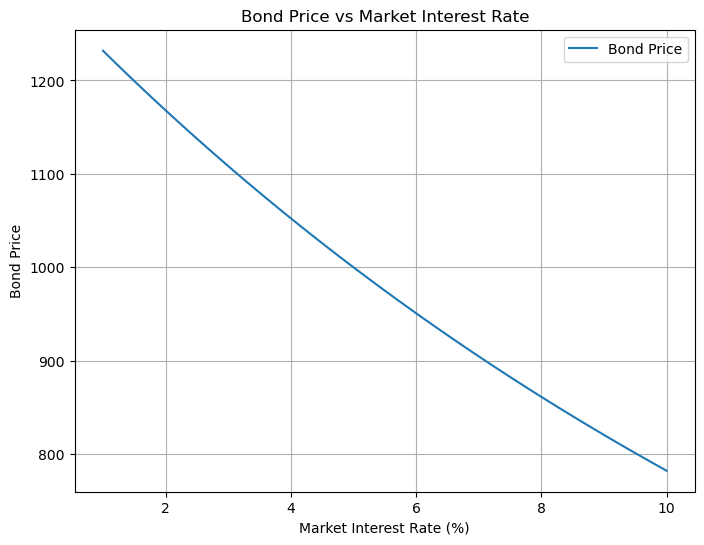

In [17]:
if __name__ == "__main__":
    print("Bond Price & YTM Calculator")
    
    face_val = float(input("Enter the face value of the bond: "))
    coup_rate = float(input("Enter the coupon rate (as a decimal, e.g., 0.05 for 5%): "))
    mt_rate = float(input("Enter the current market interest rate (as a decimal, e.g., 0.06 for 6%): "))
    years = int(input("Enter the number of years to maturity: "))
    
    price = cal_bond_price(face_val, coup_rate, mt_rate, years)
    ytm = cal_ytm(face_val, price, coup_rate, years)
    
    print(f"\nBond Price: ₹{price:.2f}")
    print(f"Yield to Maturity (YTM): {ytm * 100:.2f}%")
    
    priceplot(face_val, coup_rate, years)